In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from meteo_pkg.loader import MeteoLoader

C:\Users\yalaz\AppData\Local\Temp\ipykernel_9412\254367696.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  mensual = df["Ig"].resample("M").mean() #ME


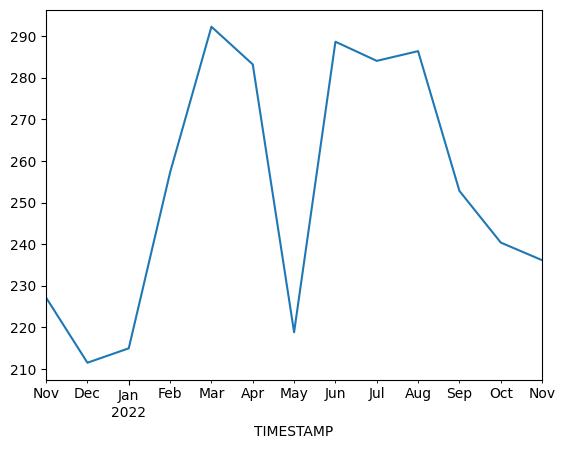

In [2]:
loader = MeteoLoader("../data/processed/datos_renombrados.parquet")
df = loader.df
mensual = df["Ig"].resample("M").mean() #ME
mensual.plot()
plt.show()

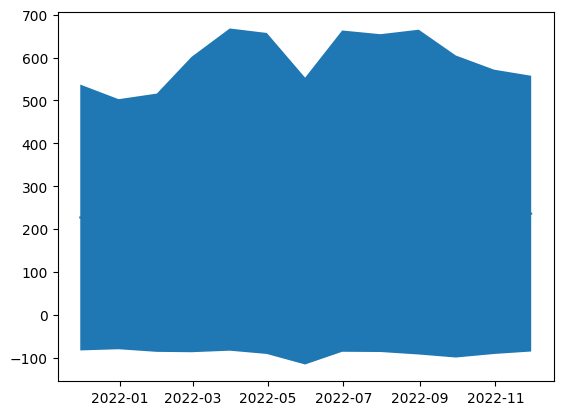

In [3]:
mean = df["Ig"].resample("ME").mean()
std = df["Ig"].resample("ME").std()

plt.plot(mean.index, mean.values)
plt.fill_between(mean.index, mean - std, mean + std)   # falta alpha, labels, etc.
plt.show()  ##??? como que -100

In [4]:
def grafica_mensual(df, columna):
    mensual = df[columna].resample("ME")
    mean = mensual.mean()
    std = mensual.std()

    plt.plot(mean)
    plt.fill_between(mean.index, mean - std, mean + std)

grafica_mensual(df)  #columnaaaaaaaa


TypeError: grafica_mensual() missing 1 required positional argument: 'columna'

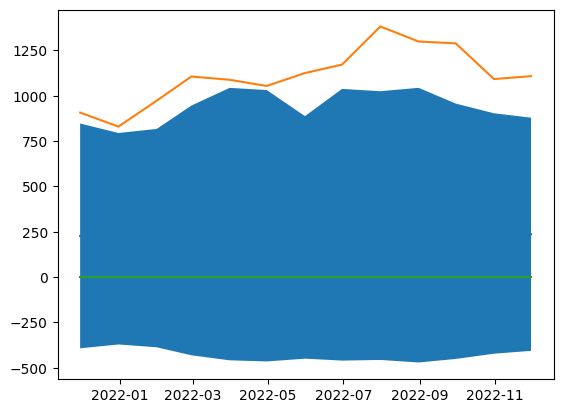

In [5]:
def grafica_mensual(df, columna, nd=1, mostrarmax=False):
    mensual = df[columna].resample("ME")
    mean = mensual.mean()
    std = mensual.std() * nd
    
    max = mensual.max()  
    min = mensual.min()   

    plt.plot(mean.index, mean.values)
    plt.fill_between(mean.index, mean - std, mean + std)

    if mostrarmax:
        plt.plot(max.index, max.values)
        plt.plot(min.index, min.values)

grafica_mensual(df, "Ig", nd=2, mostrarmax=True)   # Ahí va

In [6]:
def grafica_mensual( df: pd.DataFrame, columna: str,n: int = 1, maxmin: bool = False) -> None:
    """
    Genera una gráfica mensual de una columna de un DataFrame con índice de tiempo que muestre, por default, los promedios, pero, 
    si el usuario lo requiere, tambien las desviaciones estandar, maximos y minimos
    """

    mensual = df[columna].resample("ME")
    mean = mensual.mean()
    std = mensual.std() * n
    max_vals = mensual.max()
    min_vals = mensual.min()

    plt.figure(figsize=(12, 5))

    plt.plot(mean.index, mean.values, label="Promedio mensual")
    plt.fill_between(mean.index, mean - std, mean + std, alpha=0.3, label="Desviación estándar")

    if maxmin:
        plt.plot(max_vals.index, max_vals.values, linestyle="--", label="Máximos")
        plt.plot(min_vals.index, min_vals.values, linestyle="--", label="Mínimos")

    plt.title(f"Gráfica mensual de: {columna}")
    plt.xlabel("Fecha")
    plt.ylabel(columna)
    plt.legend()
    plt.tight_layout()
    plt.show()


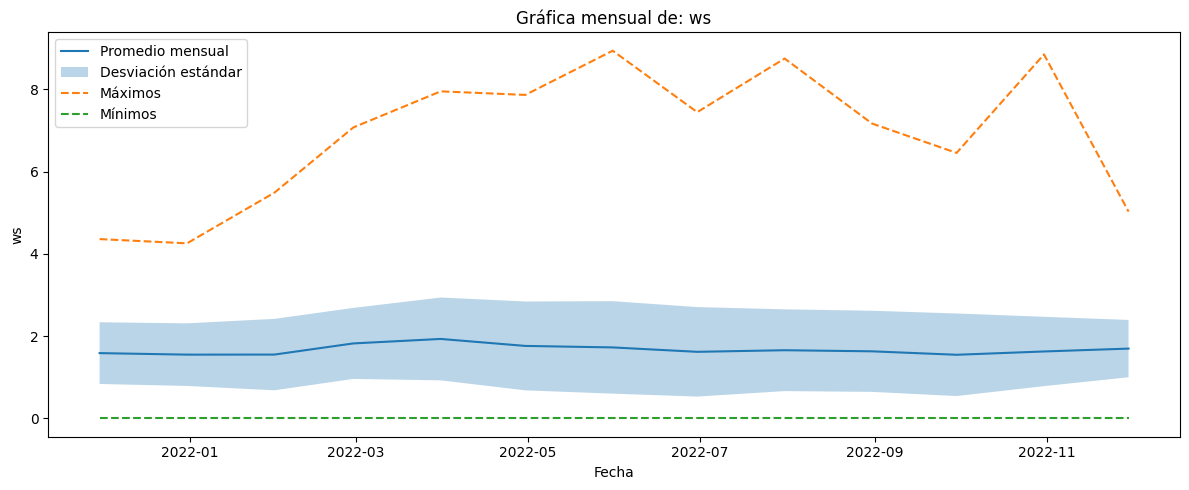

In [7]:
loader = MeteoLoader("../data/processed/datos_renombrados.parquet")
df = loader.df
grafica_mensual(df, "ws", n=1, maxmin=True)